In [1]:
#download dataset from kaggle dataset
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!kaggle datasets download -d hgultekin/bbcnewsarchive

Saving bbc-news-data.csv.zip to bbc-news-data.csv.zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [2]:
#install kaggle package
!pip install -q kaggle

In [3]:
#unzip file
!mkdir bbcnews
!unzip bbc-news-data.csv.zip -d bbcnews
!ls bbcnews

Archive:  bbc-news-data.csv.zip
  inflating: bbcnews/bbc-news-data.csv  
bbc-news-data.csv


In [4]:
import pandas as pd
df_bbcnews_nlp = pd.read_csv('bbcnews/bbc-news-data.csv', sep='\t')
df_bbcnews_nlp.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [5]:
#show list columns
df_bbcnews_nlp.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

In [6]:
df_bbcnews_nlp['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [7]:
#shape of data
print('Total Row:', df_bbcnews_nlp.shape[0])
print('Total Columns:', df_bbcnews_nlp.shape[1])
df_bbcnews_nlp.shape

Total Row: 2225
Total Columns: 4


(2225, 4)

In [8]:
df_bbcnews_nlp['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

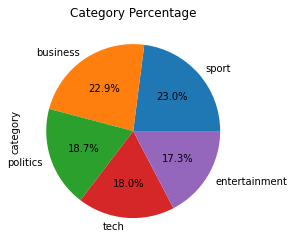

In [11]:
#Data Visualization
import matplotlib.pyplot as plt

category = df_bbcnews_nlp['category'].value_counts()
label = category.index
category.plot(kind='pie', labels=label, autopct='%1.1f%%')
plt.title('Category Percentage')
plt.show()

In [12]:
#drop 1 useless column
df_bbcnews_nlp = df_bbcnews_nlp.drop(columns=['filename'])

In [13]:
#check if missing value in data
df_bbcnews_nlp.isnull().any()

category    False
title       False
content     False
dtype: bool

In [14]:
#one-hot-encoding
categoryData = pd.get_dummies(df_bbcnews_nlp['category'])
new_df_bbcnews_nlp = pd.concat([df_bbcnews_nlp, categoryData], axis=1)
new_df_bbcnews_nlp = new_df_bbcnews_nlp.drop(columns = 'category')
new_df_bbcnews_nlp.head()

,title,content,business,entertainment,politics,sport,tech
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,1,0,0,0,0
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0


In [15]:
#processing text
import re
from string import punctuation
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from nltk.corpus import wordnet as wn
nltk.download('averaged_perceptron_tagger')

def process_text(text):
  #convert string to str
  text = str(text)

  #convert to lower strings
  text = text.lower()


  #remove the url
  url_remove = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
  text = re.sub(url_remove,' ',text)

  #remove the punctuation
  text = ''.join([string for string in text if string not in punctuation and not string.isdigit()])

  #remove special characters
  special_character = re.compile(r'[^a-zA-Z]')
  text = re.sub(special_character,' ',text)
  text = text.strip()
  text = text.split(' ')

  #removing all stop words
  text = ' '.join([string for string in text if string not in stopwords.words('english')])

  #removing number
  text = re.sub('[0-9]+','',text)

  #lematization
  lemmatizer = WordNetLemmatizer()
  pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
  text = (' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

  #remove html
  text = re.sub("(<.*?>)","",text)

  #remove non-ascii and digits
  text=re.sub("(\\W|\\d)"," ",text)

  #remove whitespace
  text = text.strip()

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [16]:
new_df_bbcnews_nlp.loc[:, ['title']] = new_df_bbcnews_nlp['title'].apply(process_text)
new_df_bbcnews_nlp.loc[:, ['content']] = new_df_bbcnews_nlp['content'].apply(process_text)
new_df_bbcnews_nlp.head()

,title,content,business,entertainment,politics,sport,tech
0,ad sale boost time warner profit,quarterly profit u medium giant timewarner jum...,1,0,0,0,0
1,dollar gain greenspan speech,dollar hit highest level euro almost three mon...,1,0,0,0,0
2,yukos unit buyer face loan claim,owner embattled russian oil giant yukos ask bu...,1,0,0,0,0
3,high fuel price hit ba profit,british airway blamed high fuel price drop pro...,1,0,0,0,0
4,pernod takeover talk lift domecq,share uk drink food firm allied domecq risen s...,1,0,0,0,0


In [17]:
bbcnews_columns = ['title','content']
label_columns = [column for column in new_df_bbcnews_nlp.columns if column not in bbcnews_columns]

In [18]:
bbcnews = [",".join(item) for item in new_df_bbcnews_nlp[bbcnews_columns].values.astype(str)]
label = new_df_bbcnews_nlp[label_columns].values

In [19]:
from sklearn.model_selection import train_test_split
bbcnews_train, bbcnews_test, label_train, label_test = train_test_split(bbcnews, label, test_size=0.2, random_state=42, shuffle = True)

In [20]:
#Specific Tokenizing
size = 17000
embedding_dim = 64
max_len = 256
trunc_type = "post"
oov = "<OOV>"

In [21]:
#Tokenizing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=size, oov_token=oov)
tokenizer.fit_on_texts(bbcnews_train)

sekuens_train = tokenizer.texts_to_sequences(bbcnews_train)
sekuens_test = tokenizer.texts_to_sequences(bbcnews_test)

padded_train = pad_sequences(sekuens_train, maxlen=max_len, truncating=trunc_type)
padded_test = pad_sequences(sekuens_test, maxlen=max_len, truncating=trunc_type)

In [23]:
#Data Modelling

import tensorflow as tf
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=size, output_dim=embedding_dim, input_length=max_len),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
  tf.keras.layers.GlobalMaxPool1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 64)           1088000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256, 512)          657408    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [26]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      self.model.stop_training = True
      print("\nAccuracy of training set and validation set has reached 95%")
callbacks = myCallback() 

In [27]:
num_epochs = 30
history = model.fit(
    padded_train, 
    label_train, 
    epochs=num_epochs,
    validation_data=(padded_test, label_test),
    callbacks=[callbacks], 
    verbose = 2)

Epoch 1/30
56/56 - 91s - loss: 1.5202 - accuracy: 0.2966 - val_loss: 1.2157 - val_accuracy: 0.3978
Epoch 2/30
56/56 - 87s - loss: 1.0160 - accuracy: 0.5416 - val_loss: 0.8050 - val_accuracy: 0.6674
Epoch 3/30
56/56 - 87s - loss: 0.3447 - accuracy: 0.8916 - val_loss: 0.2809 - val_accuracy: 0.9124
Epoch 4/30
56/56 - 86s - loss: 0.0658 - accuracy: 0.9815 - val_loss: 0.2939 - val_accuracy: 0.9348
Epoch 5/30
56/56 - 87s - loss: 0.0344 - accuracy: 0.9916 - val_loss: 0.4884 - val_accuracy: 0.8854
Epoch 6/30
56/56 - 87s - loss: 0.0566 - accuracy: 0.9854 - val_loss: 0.2108 - val_accuracy: 0.9528

Accuracy of training set and validation set has reached 95%


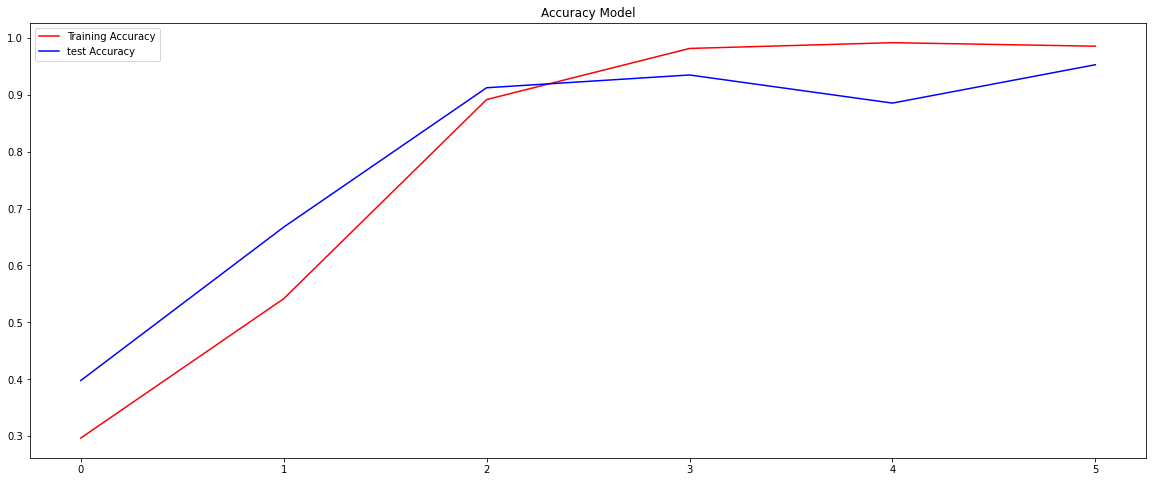

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(epochs, acc, 'r', label='Training Accuracy')
ax.plot(epochs, val_acc, 'b', label='test Accuracy')
ax.set_title('Accuracy Model')
plt.legend(loc=0)
plt.figure()

plt.show()